<a href="https://colab.research.google.com/github/pgldias/MVP_EDA/blob/main/MVP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados – CS:GO Round Snapshots

**Nome:** Pedro Gateira L. Dias

**Matrícula:** 4052025000042

**Dataset:** [CS:GO Round Snapshots](https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification/data)

**Alternativa para o Colab:** [![Abrir no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pgldias/MVP_EDA/blob/main/MVP_EDA.ipynb)


# 1. Introdução e Definição do Problema

O Counter-Strike: Global Offensive (CS:GO) é um jogo de tiro tático em equipe. Cada rodada envolve decisões estratégicas entre Terroristas (T) e Contra-Terroristas (CT). A partir dos dados coletados, é possível entender quais condições aumentam a chance de vitória — revelando padrões táticos e fatores decisivos, além de insights sobre a dinâmica de jogo.








## Problema

O objetivo deste trabalho é investigar quais variáveis influenciam o resultado de uma rodada em partidas de CS:GO. Neste MVP o foco ainda não será na construção de um modelo preditivo, mas principalmente na compreensão de quais características — como equipamentos, economia, status da bomba ou número de jogadores vivos — estão associadas à vitória da rodada.

## Hipóteses iniciais

Com base no contexto do jogo e na estrutura do dataset, levantei as seguintes hipóteses a serem exploradas ao longo da análise:

- O número de jogadores vivos tem forte influência sobre o resultado da rodada.
- Ter a bomba plantada tende a favorecer a equipe T.
- Ter uma AWP no time pode determinar a vantagem do round, se um time tiver e outro não é um fator decisivo.
- A economia da equipe (dinheiro disponível) impacta diretamente nas chances de vitória.
- A quantidade de granadas próximo ao final do round é um fator decisivo.
- Alguns mapas podem oferecer vantagem tática intrínseca para um dos lados (CT ou T), independentemente das variáveis em jogo.

## Tipo de Problema

Trata-se de um **problema de aprendizado supervisionado**, pois há uma variável-alvo (`round_winner`) para ser predita, ela indica se a rodada foi vencida pelos CTs ou pelos Ts. Para isso temos diversos dados (snapshots) obtidos durante as rodadas e prever o resultado.

## Condições de Seleção dos Dados

O dataset utilizado neste trabalho foi originalmente publicado pela [Skybox](https://skybox.gg/) como parte do CS:GO AI Challenge, e reúne dados de partidas profissionais de alto nível disputadas em 2019 e 2020. O conjunto representa snapshots de rodadas coletados sob condições específicas, conforme detalhado abaixo:

- **Partidas profissionais de torneios oficiais**: Os dados foram extraídos exclusivamente de aproximadamente 700 demos de partidas de alto nível, garantindo um padrão elevado de jogabilidade e tomada de decisão estratégica.

- **Rounds válidos apenas**: Foram excluídas do dataset todas as rodadas de aquecimento (*warmups*) e reinícios (*restarts*), mantendo apenas rodadas oficiais e em andamento real.

- **Snapshots a cada 20 segundos**: Durante cada rodada viva, foram capturados snapshots a intervalos fixos de 20 segundos. Isso significa que cada rodada pode ter múltiplas entradas no dataset, registrando o estado do jogo em diferentes momentos da rodada.

- **Recorte até o fim da rodada**: Os snapshots foram registrados até o momento em que a rodada foi decidida, permitindo uma análise da progressão do round, embora não com granularidade de segundo a segundo.

- **Pré-processamento e estrutura plana**: Após a publicação inicial, o dataset passou por um processo de flattening e limpeza, removendo estruturas aninhadas para facilitar a leitura e o uso por algoritmos de machine learning.

- **Número total de snapshots**: O dataset final contém 122.410 snapshots, o que representa uma amostra significativa da dinâmica tática das partidas.

Essas restrições são importantes para delimitar o escopo da análise. Como os dados representam momentos fixos dentro de rodadas de alto nível, as conclusões obtidas podem não ser generalizáveis para jogadores casuais ou partidas com regras alternativas. Além disso, o fato de termos múltiplos snapshots por rodada reforça a necessidade de cuidado ao tratar independência das amostras.


## Limitações Derivadas das Condições de Seleção

Com base nas condições de coleta e pré-processamento do dataset, algumas limitações importantes devem ser consideradas ao interpretar os resultados deste trabalho:

- **Foco em partidas profissionais**: Os dados refletem exclusivamente o estilo de jogo de alto nível competitivo. Ou seja, podem diferir significativamente de partidas casuais ou amadoras.

- **Granularidade temporal limitada**: Embora os snapshots sejam extraídos a cada 20 segundos, isso ainda representa uma visão parcial da rodada. Mudanças rápidas (como trocas de kills ou rotações) podem ocorrer entre os snapshots e não serem registradas.

- **Ausência de histórico sequencial por rodada**: Informações como o histórico econômico da equipe, streaks de vitórias, ou mudanças no armamento anterior ao snapshot não estão disponíveis.

- **Potencial dependência entre snapshots**: Como múltiplos snapshots podem vir de uma mesma rodada, há risco de dependência entre algumas observações. Isso pode impactar análises que assumem independência entre amostras, como validação cruzada ou modelos supervisionados.

Essas limitações não comprometem a qualidade do dataset, mas é importantes que sejam consideradas na interpretação dos resultados e  eventual validação de modelos preditivos.


## Dicionário de Atributos

O dataset contém 97 atributos, a seguir estão listados os principais atributos com suas respectivas definições:

### Informações da Rodada
- **time_left**: Tempo restante na rodada atual (em segundos).
- **map**: Mapa em que a rodada está sendo jogada (ex.: `de_dust2`, `de_inferno`, `de_overpass`).
- **bomb_planted**: Indica se a bomba foi plantada (`False` = não, `True` = sim).
- **round_winner**: Equipe vencedora da rodada (`CT` para Counter-Terrorists, `T` para Terrorists).

### Placar
- **ct_score**: Pontuação atual da equipe Counter-Terrorist.
- **t_score**: Pontuação atual da equipe Terrorist.

### Estado dos Jogadores
- **ct_players_alive**: Número de jogadores vivos na equipe Counter-Terrorist (0 a 5).
- **t_players_alive**: Número de jogadores vivos na equipe Terrorist (0 a 5).
- **ct_health**: Soma da saúde de todos os jogadores vivos da equipe CT (cada jogador varia de 0 a 100).
- **t_health**: Soma da saúde de todos os jogadores vivos da equipe T.
- **ct_armor**: Soma da armadura de todos os jogadores da equipe CT.
- **t_armor**: Soma da armadura de todos os jogadores da equipe T.
- **ct_helmets**: Quantidade de jogadores com capacete na equipe CT.
- **t_helmets**: Quantidade de jogadores com capacete na equipe T.

### Economia
- **ct_money**: Soma total do dinheiro disponível da equipe CT (em dólares).
- **t_money**: Soma total do dinheiro disponível da equipe T (em dólares).
- **ct_defuse_kits**: Quantidade de kits de desarme com a equipe CT.

### Armas
- **ct_weapon_X**: Quantidade de jogadores com a arma X na equipe CT. Exemplos de X: `AK47`, `Deagle`, `UMP45`.
- **t_weapon_X**: Quantidade de jogadores com a arma X na equipe T.

### Granadas
- **ct_grenade_X**: Quantidade de granadas do tipo X na equipe CT. Exemplos de X: `HeGrenade`, `Flashbang`, `SmokeGrenade`.
- **t_grenade_X**: Quantidade de granadas do tipo X na equipe T.

---

Esses atributos representam o estado da partida em momentos específicos durante as rodadas, registrados em snapshots a cada 20 segundos. A maioria dos campos é numérica e reflete contagens ou somatórios por equipe.


# 2. Imports e Carga dos Dados

In [1]:
# Se for a primeira execução talvez seja necessário descomentar a linha abaixo

# pip install -q kagglehub[pandas-datasets]

In [2]:
# Imports
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Define o nome exato do arquivo dentro do dataset
file_path = "csgo_round_snapshots.csv"

# Carrega o dataset usando KaggleHub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "christianlillelund/csgo-round-winner-classification",
    file_path
)

# Visualiza as primeiras linhas
df.head(3)


/tmp/ipython-input-3-2375038771.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 3.53M/3.53M [00:00<00:00, 78.4MB/s]

Extracting zip of csgo_round_snapshots.csv...


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


## Utils

Funções utilizadas ao longo do notebook

In [4]:
# Configurações globais de estilo e cores do notebook
# Paleta de cores inspirada nas equipes do CS:GO para facilitar identidade das equipes.

colors_csgo = {
    "neutral": "#A9A9A9", # Cinza para dados neutros
    "T": "#E6B800",     # Amarelo/dourado - Terroristas (T)
    "CT": "#3366CC",    # Azul escuro - Contra-Terroristas (CT)
    "T_dark": "#B38600",
    "CT_dark": "#254E89"
}

# Setando estilo global
sns.set_style("whitegrid")
sns.set_palette([colors_csgo["CT"], colors_csgo["T"]])
sns.set_context("notebook", font_scale=1.0, rc={"figure.figsize": (15, 8)})
sns.set_theme(style="whitegrid", palette=colors_csgo.values(), font_scale=1.0)



In [5]:
# Funções de visualização

# Plota um histograma para visualizar a distribuição de frequências de uma variável numérica.
def plot_histogram(df, column, bins=10, title=None, color='neutral'):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], bins=bins, kde=True, color=colors_csgo.get(color, "#A9A9A9"))
    plt.title(title if title else f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plota boxplots para comparar a distribuição de uma variável numérica entre as classes (CT e T).
def plot_box_by_class(df, feature, target, title=None):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=target, y=feature, hue=target, palette={
        'CT': colors_csgo['CT'],
        'T': colors_csgo['T']
    }, dodge=False)
    plt.title(title if title else f'{feature} por {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plota a distribuição das classes (ex: CT vs T) em forma de barras.
def plot_class_distribution(df, column, title=None):
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=column, hue='round_winner', legend=False, palette={
        'CT': colors_csgo['CT'],
        'T': colors_csgo['T']
    })
    plt.title(title if title else f'Distribuição de {column}')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.tight_layout()
    plt.show()


# Plota uma matriz de correlação entre variáveis numéricas, destacando as correlações com cores.
def plot_correlation_heatmap(df, columns=None, title="Matriz de Correlação"):
    corr = df[columns].corr() if columns else df.corr(numeric_only=True)
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plota um gráfico de barras com as variáveis mais correlacionadas com a variável-alvo (CT ou T), acima de um limiar.
def plot_target_correlations(df, target_column, threshold=0.05):
    df_temp = df.copy()
    df_temp[target_column] = df_temp[target_column].map({'CT': 0, 'T': 1})
    corrs = df_temp.corr(numeric_only=True)[target_column].drop(target_column)
    corrs = corrs[abs(corrs) >= threshold].sort_values()

    plt.figure(figsize=(8, 10))
    sns.barplot(x=corrs.values, y=corrs.index, color=colors_csgo["neutral"])
    plt.title(f'Correlação com {target_column} (>|{threshold}|)')
    plt.xlabel('Correlação')
    plt.tight_layout()
    plt.show()


# 3. Análise Exploratória de Dados (EDA)

A Análise Exploratória de Dados (EDA) tem como objetivo principal compreender melhor a estrutura do dataset, identificar padrões, detectar anomalias, valores ausentes e outras características relevantes que possam influenciar nas próximas etapas do projeto.

Nesta seção, serão utilizadas estatísticas descritivas e visualizações gráficas para entender a distribuição das variáveis e suas possíveis relações com o resultado da rodada. Esta análise também serve como base para validar ou refinar as hipóteses levantadas anteriormente.


In [6]:
# Informação dos atributos, verificação de valores nulos e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

Pela info() já podemos ver que não teremos que tratar dados nulos nesse dataset, todas as colunas estão preenchidas.

In [7]:
# estatísticas descritivas básicas do dataset
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


Pela describe() já podemor ver que existe uma diferença nos ranges de valores, provavelmente será necessária uma normalização. Além disso alguns valores me parecem impossíveis dentro do meu conhecimento do jogo (ex.: max de smoke_granades ser maior que 5; ou t_health > 500).

## Validação e Limpeza de Dados

Durante a análise exploratória inicial, foram identificados alguns valores inconsistentes ou fisicamente impossíveis no dataset. Por exemplo, o valor de `t_health` ultrapassando o limite de 500 (o que excede o total possível de saúde para 5 jogadores vivos).

Essa etapa tem como objetivo eliminar ou corrigir esses registros inválidos, de modo a garantir integridade e confiabilidade nas próximas análises e modelagens.


In [8]:
# Cópia do DataFrame original
df_check = df.copy()

# Condições de valores inválidos conhecidas previamente
invalid_conditions = {
    'ct_health > 500': df_check['ct_health'] > 500,
    't_health > 500': df_check['t_health'] > 500,
    'ct_players_alive > 5': df_check['ct_players_alive'] > 5,
    't_players_alive > 5': df_check['t_players_alive'] > 5,
    'ct_helmets > 5': df_check['ct_helmets'] > 5,
    't_helmets > 5': df_check['t_helmets'] > 5,
    'ct_defuse_kits > 5': df_check['ct_defuse_kits'] > 5,
    'ct_money < 0 or > 80000': (df_check['ct_money'] < 0) | (df_check['ct_money'] > 80000),
    't_money < 0 or > 80000': (df_check['t_money'] < 0) | (df_check['t_money'] > 80000),
    'time_left < 0 or > 175': (df_check['time_left'] < 0) | (df_check['time_left'] > 175),
}

# Detecta granadas acima de 5 (exceto flashbangs, que podem ser até 10)
granadas_ct = [col for col in df.columns if col.startswith("ct_grenade_")]
granadas_t = [col for col in df.columns if col.startswith("t_grenade_")]

for col in granadas_ct + granadas_t:
    limite = 10 if "flashbang" in col.lower() else 5
    invalid_conditions[f'{col} > {limite}'] = df_check[col] > limite

# Quantidade de registros afetados por condição
print("Registros inválidos por condição:\n")
for description, condition in invalid_conditions.items():
    print(f"{description}: {condition.sum()} registros")

# Total de registros inválidos únicos
mascara_combinada = pd.concat(invalid_conditions.values(), axis=1).any(axis=1)
registros_invalidos = df_check[mascara_combinada]

print(f"\nTotal de registros inválidos únicos: {registros_invalidos.shape[0]}")


Registros inválidos por condição:

ct_health > 500: 0 registros
t_health > 500: 1 registros
ct_players_alive > 5: 0 registros
t_players_alive > 5: 1 registros
ct_helmets > 5: 0 registros
t_helmets > 5: 0 registros
ct_defuse_kits > 5: 0 registros
ct_money < 0 or > 80000: 0 registros
t_money < 0 or > 80000: 0 registros
time_left < 0 or > 175: 0 registros
ct_grenade_hegrenade > 5: 0 registros
ct_grenade_flashbang > 10: 0 registros
ct_grenade_smokegrenade > 5: 1 registros
ct_grenade_incendiarygrenade > 5: 0 registros
ct_grenade_molotovgrenade > 5: 0 registros
ct_grenade_decoygrenade > 5: 0 registros
t_grenade_hegrenade > 5: 0 registros
t_grenade_flashbang > 10: 0 registros
t_grenade_smokegrenade > 5: 1 registros
t_grenade_incendiarygrenade > 5: 0 registros
t_grenade_molotovgrenade > 5: 0 registros
t_grenade_decoygrenade > 5: 0 registros

Total de registros inválidos únicos: 3


In [39]:
# Analisando caso a caso

Case1 = df[df['t_players_alive']>5]

Case1
# Esse caso deve ter sido um bug pois é antes do inicio do round (time_left = 175), deve ter entrado um jogador a mais e por isso será limpado, esse caso extrapola o t_health e t_players_alive.

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,ct_grenades_total,t_grenades_total
58271,175.0,0.0,0.0,de_vertigo,False,400.0,600.0,0.0,0.0,3200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,0.0,0.0


In [10]:
Case2 = df[df['t_grenade_smokegrenade']>5]

Case2
# Esse caso também é antes do inicio do round (time_left = 175) e será excluido por não ser possível.

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
27966,175.0,0.0,3.0,de_inferno,False,500.0,500.0,0.0,351.0,27300.0,...,7.0,2.0,9.0,3.0,0.0,0.0,1.0,0.0,0.0,T


In [11]:
Case3 = df[df['ct_grenade_smokegrenade']>5]

Case3

# Esse caso também deve ter ocorrido algum engano antes do round, pode ser a mesma partida de cima, mas não necessáriamente, também será exluido

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
98359,175.0,6.0,2.0,de_inferno,False,500.0,500.0,196.0,271.0,22750.0,...,4.0,6.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,T


In [12]:
# Concatena os índices dos casos inválidos
indexes_to_remove = pd.concat([Case1, Case2, Case3]).index.unique()

# Remove do DataFrame original
df_clean = df.drop(index=indexes_to_remove)

print(f'Total de registros antes da limpeza: {df.shape[0]}' )

print(f'Total de registros após limpeza: {df_clean.shape[0]}')

df = df_clean.copy()


Total de registros antes da limpeza: 122410
Total de registros após limpeza: 122408


## De volta para o EDA

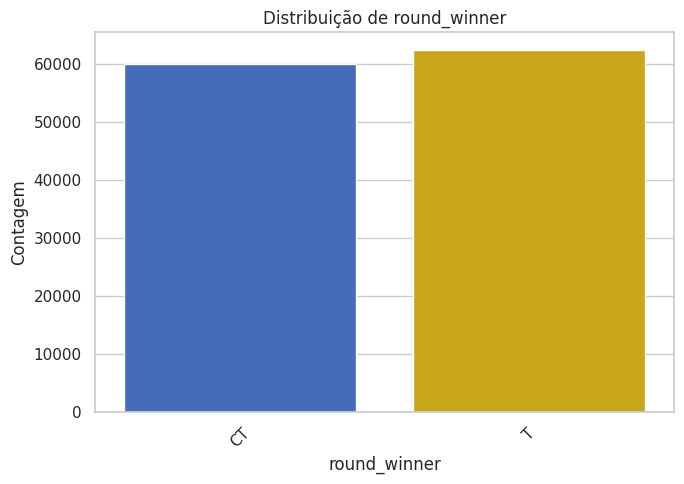

In [13]:
# Esse gráfico foi plotado para testar o balanceamento das variaveis alvo, podemos ver que está relativamente balanceado.

plot_class_distribution(df, 'round_winner')

Esse gráfico permite verificar o balanceamento entre vitórias dos CTs e Ts. Pode indicar se o dataset está equilibrado ou se há viés para um dos lados — o que é importante para modelagem supervisionada.

In [14]:

df.groupby('round_winner').describe(percentiles=None).transpose()

#Foi transposta para facilitar a leitura e exploração

round_winner                            CT             T
time_left              count  60004.000000  62404.000000
                       mean     101.719145     94.199612
                       std       52.794006     55.776853
                       min        0.080000      0.010000
                       25%       54.950000     46.880000
...                                    ...           ...
t_grenade_decoygrenade min        0.000000      0.000000
                       25%        0.000000      0.000000
                       50%        0.000000      0.000000
                       75%        0.000000      0.000000
                       max        2.000000      2.000000

[752 rows x 2 columns]

In [15]:
df.groupby('round_winner').ct_weapon_awp.mean().round(2)

,ct_weapon_awp
round_winner,
CT,0.71
T,0.44


Após explorar as estatísticas com `describe()` agrupado pela equipe vencedora do round, verifiquei novamente os valores máximos e mínimos de cada atributo — e agora todos estão consistentes.

Além disso, ao comparar algumas médias, percebi que elas já começam a refletir as hipóteses propostas.

Por exemplo, a hipótese de que **ter uma AWP no time pode influenciar na vitória do round** faz sentido ao analisar o atributo `ct_weapon_awp`:  
- Quando os **Terroristas** vencem, a média de AWPs no time CT é **baixa**.  
- Quando os **Contra-Terroristas** vencem, essa média é **mais alta**.


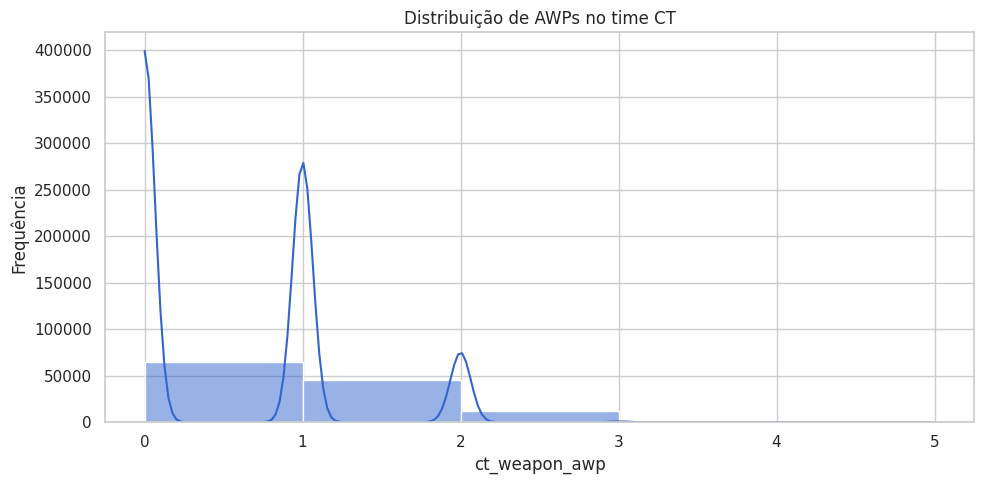

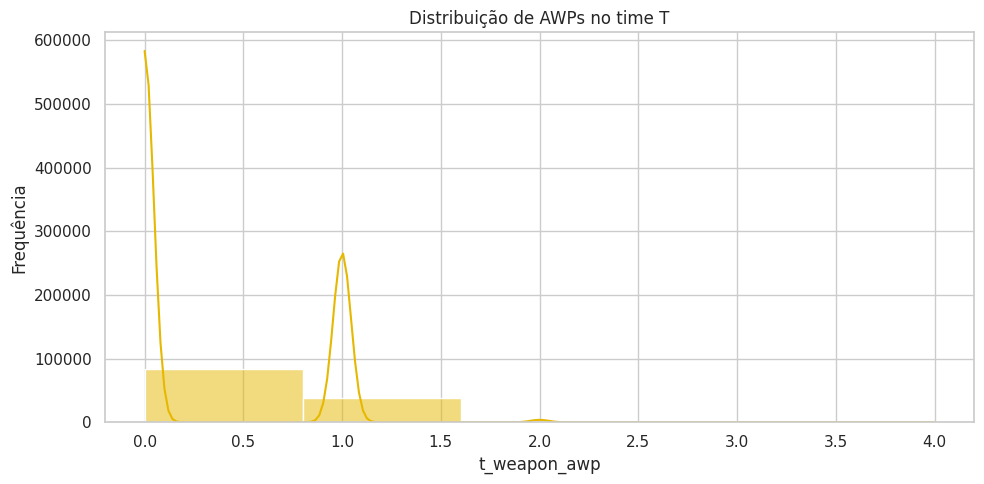

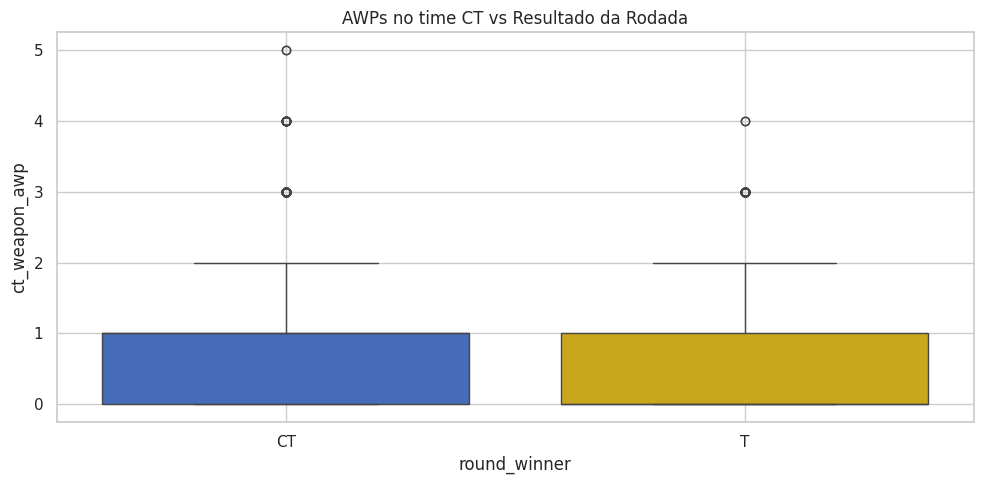

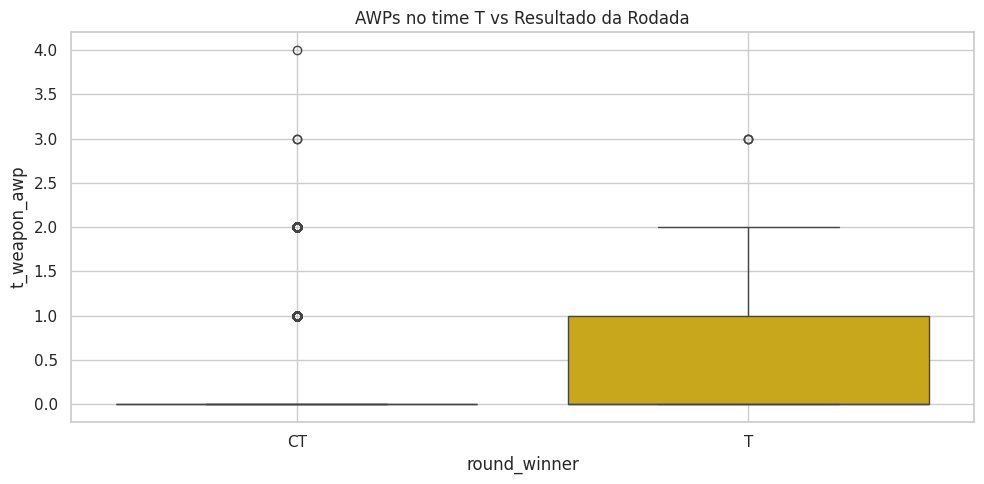

In [16]:
# Já que estamos verificando esse atributo seguem gráficos para auxiliar nessa hipótese

col_ct_awp = 'ct_weapon_awp'
col_t_awp = 't_weapon_awp'

# Histograma: Quantidade de AWPs nos times CT e T
plot_histogram(df, col_ct_awp, bins=5, title="Distribuição de AWPs no time CT", color='CT')
plot_histogram(df, col_t_awp, bins=5, title="Distribuição de AWPs no time T", color='T')

# Boxplots: Comparação da presença da AWP por vencedor da rodada
plot_box_by_class(df, col_ct_awp, 'round_winner', title="AWPs no time CT vs Resultado da Rodada")
plot_box_by_class(df, col_t_awp, 'round_winner', title="AWPs no time T vs Resultado da Rodada")


Pelos histogramas podemos observar que os CTs tendem a comprar um número maior de AWPs por rodada, porém pelos box plot, vemos ter AWP no CT é quase garantido, portanto não é o que define o round. No segundo box plot que tem a quantidade de AWPs dos Ts, vemos que ter uma AWP ajuda no resultado do round em favor do time Terrorista, quando os CTs ganham os Ts costumam não ter a arma.

### Testando as demais hipóteses

#### Número de Jogadores Vivos

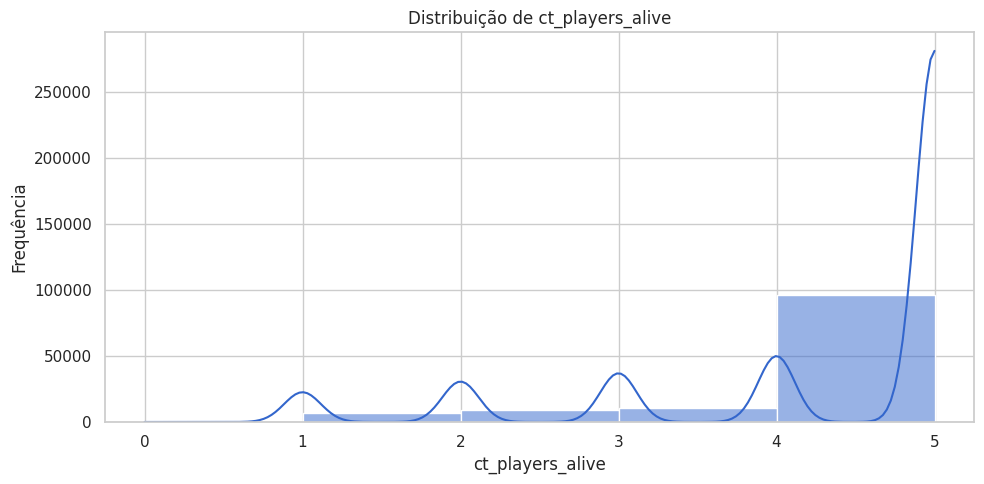

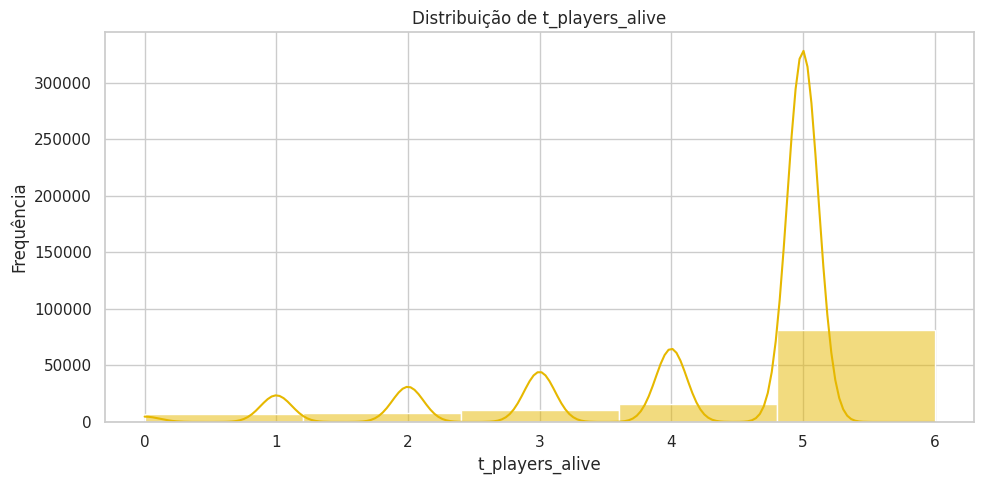

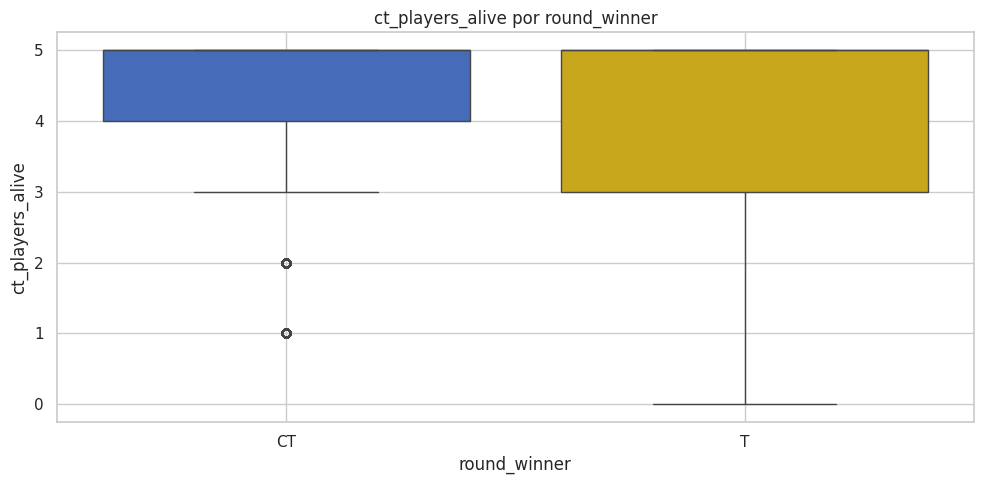

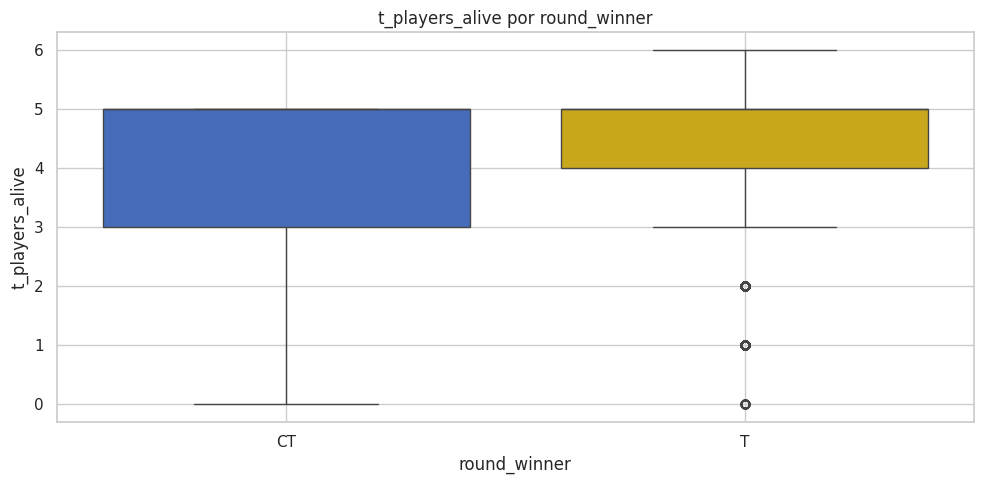

In [17]:

# Histograma da quantidade de jogadores vivos por time
plot_histogram(df, 'ct_players_alive', bins=5, color='CT')
plot_histogram(df, 't_players_alive', bins=5, color='T')

# Boxplot comparando jogadores vivos e vencedor da rodada
plot_box_by_class(df, 'ct_players_alive', 'round_winner')
plot_box_by_class(df, 't_players_alive', 'round_winner')


Nesta seção analisamos como a quantidade de jogadores vivos por time influencia no resultado da rodada.

Os histogramas mostram a frequência de snapshots com diferentes quantidades de jogadores vivos nos times CT e T. Podemos ver que na grande maioria dos snapshots temos todos os jogadores vivos.

Já os boxplots revelam a relação entre o número de jogadores vivos e o time que venceu a rodada.

A ideia é verificar se a vantagem numérica durante o round se traduz em maior chance de vitória. Nesse caso podemos ver que quando algum time ganha o round seus jogadores estão vivos em sua maioria, quando perde existe uma variação maior.


#### Presença da Bomba Plantada

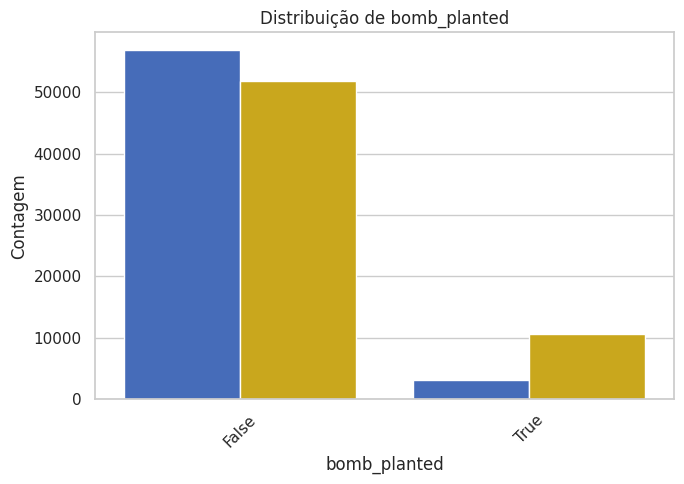

In [18]:
plot_class_distribution(df, 'bomb_planted')


A bomba plantada cria pressão no time CT e muda completamente o estilo de jogo. Nesta análise verificamos:

- Quantas snapshots ocorreram com a bomba plantada (`True`) ou não (`False`);
- A distribuição do vencedor da rodada em cada cenário.

Nos casos que a bomba foi plantada, vemos que existe uma vantagem considerável para o time Terrorista, já no caso em que não foi, existe uma vantagem para o time CT, porém não tanta pois os Ts podem ganhar o round sem plantar, matando todos os CTs.


#### Economia das Equipes

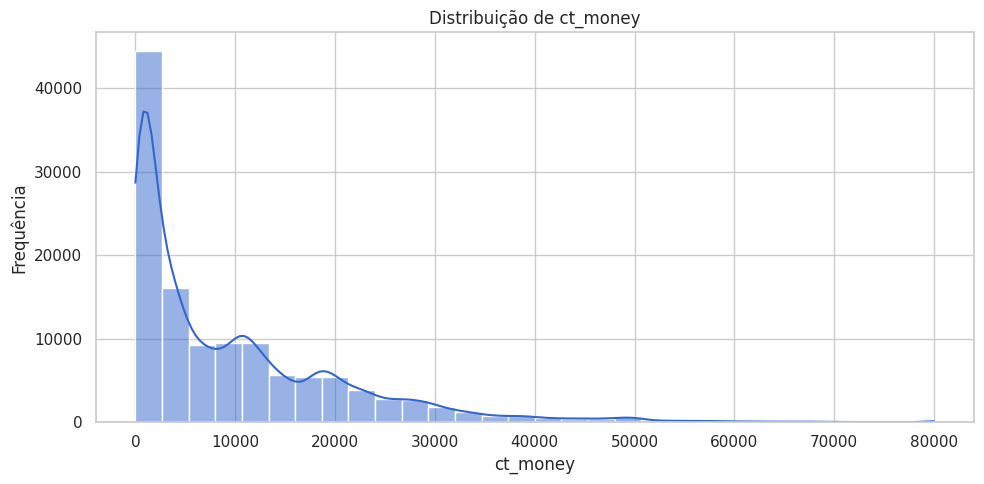

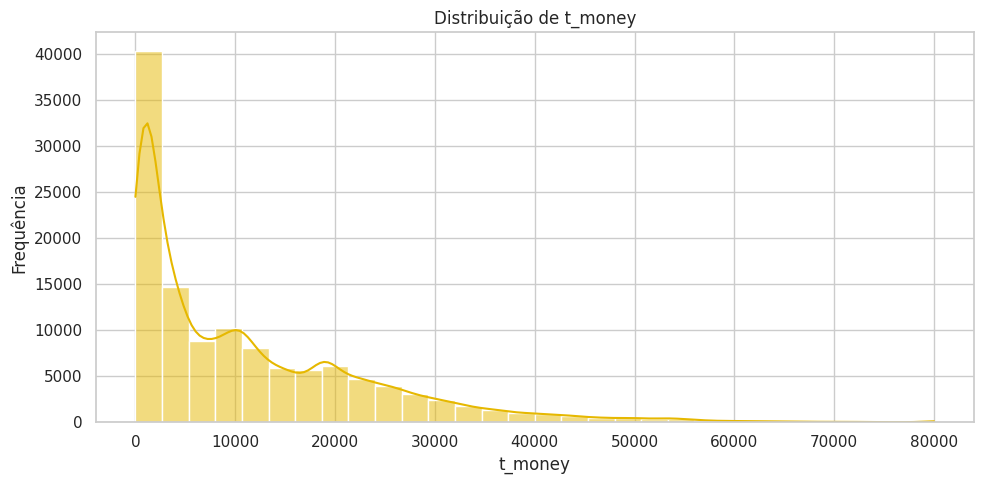

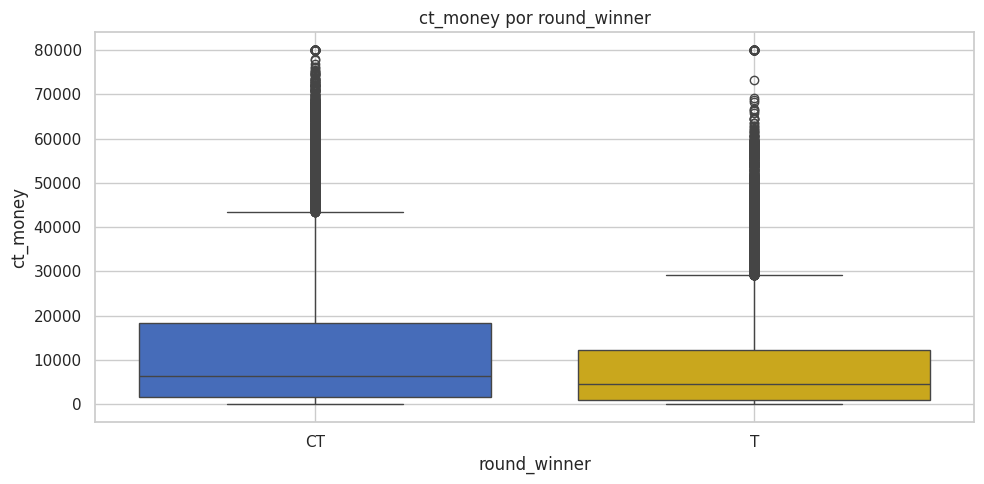

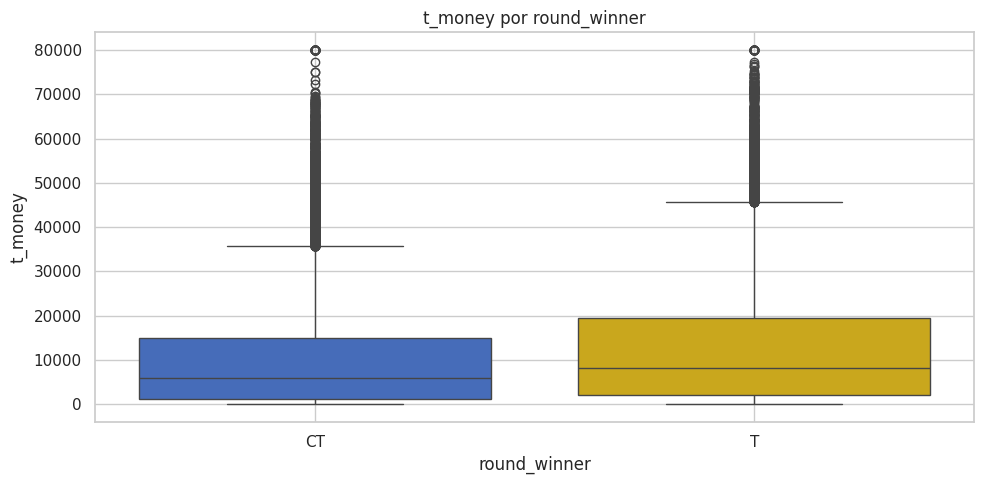

In [19]:
# Histograma das economias
plot_histogram(df_clean, 'ct_money', bins=30, color='CT')
plot_histogram(df_clean, 't_money', bins=30, color='T')

# Boxplot comparando dinheiro e resultado
plot_box_by_class(df_clean, 'ct_money', 'round_winner')
plot_box_by_class(df_clean, 't_money', 'round_winner')


O valor monetário disponível influencia diretamente no tipo de armamento e utilitários comprados. Avaliamos:

- Distribuição do dinheiro por time;
- Relação entre economia e resultado da rodada.

A expectativa de que times com mais dinheiro tenham vantagem por conseguirem armamentos melhores, foi confirmada com a média de dinheiro da equipe vencedora sendo maior do que quando perde o round.

#### Quantidade Total de Granadas por Time

In [20]:
# Identifica colunas de granadas por time
ct_grenades_cols = [col for col in df.columns if col.startswith('ct_grenade_')]
t_grenades_cols = [col for col in df.columns if col.startswith('t_grenade_')]

# Cria colunas com total de granadas por time
df['ct_grenades_total'] = df[ct_grenades_cols].sum(axis=1)
df['t_grenades_total'] = df[t_grenades_cols].sum(axis=1)


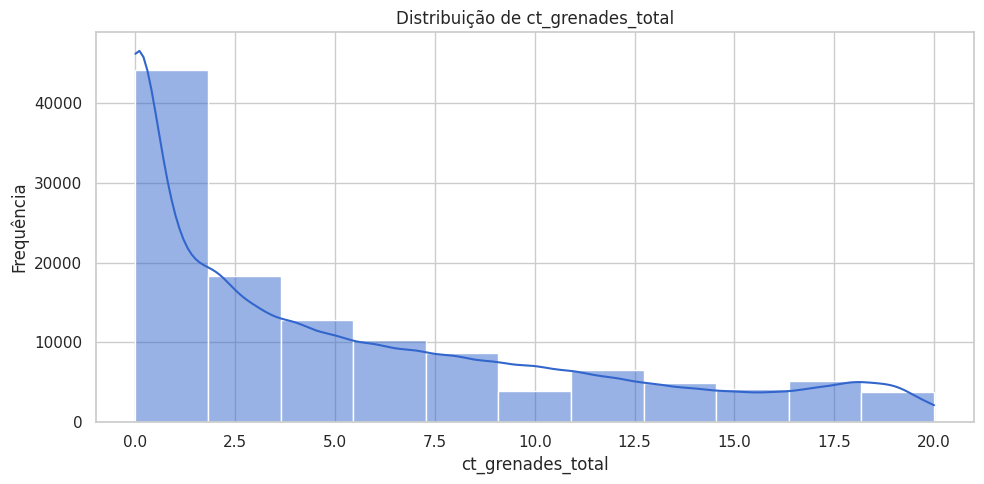

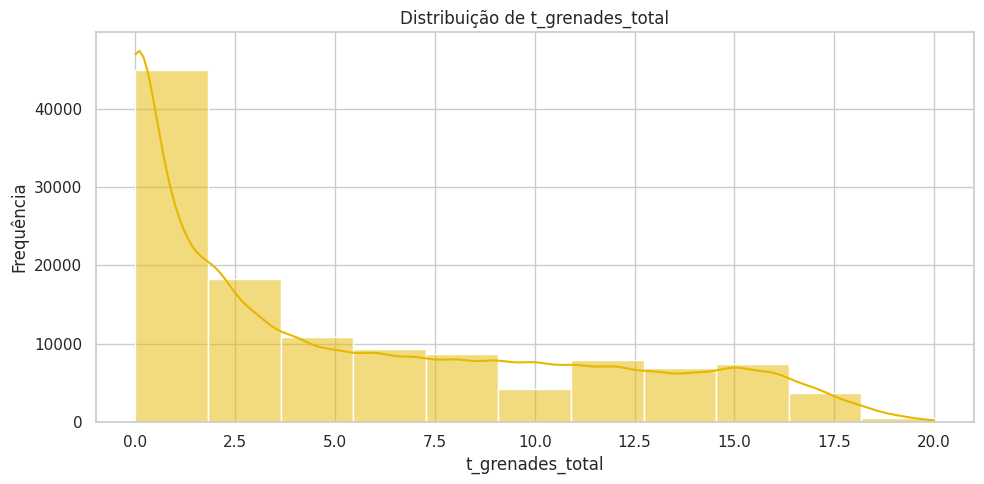

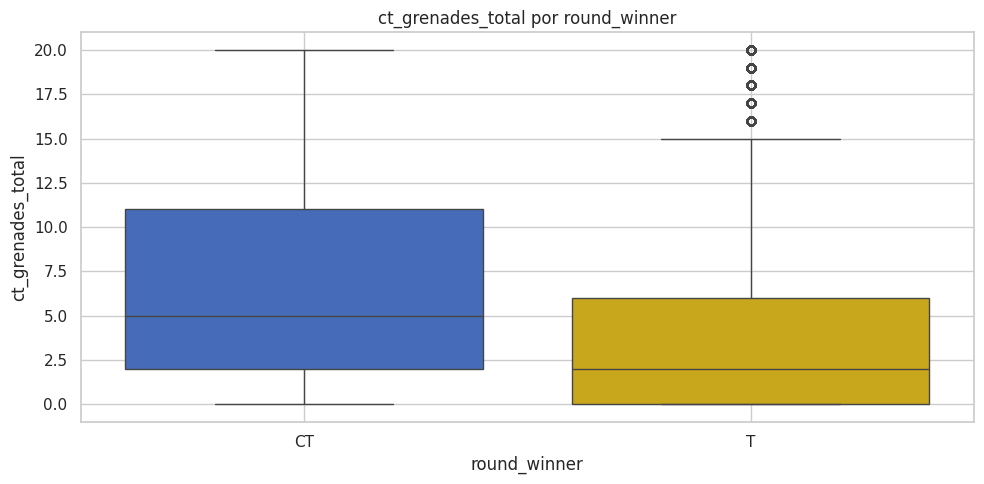

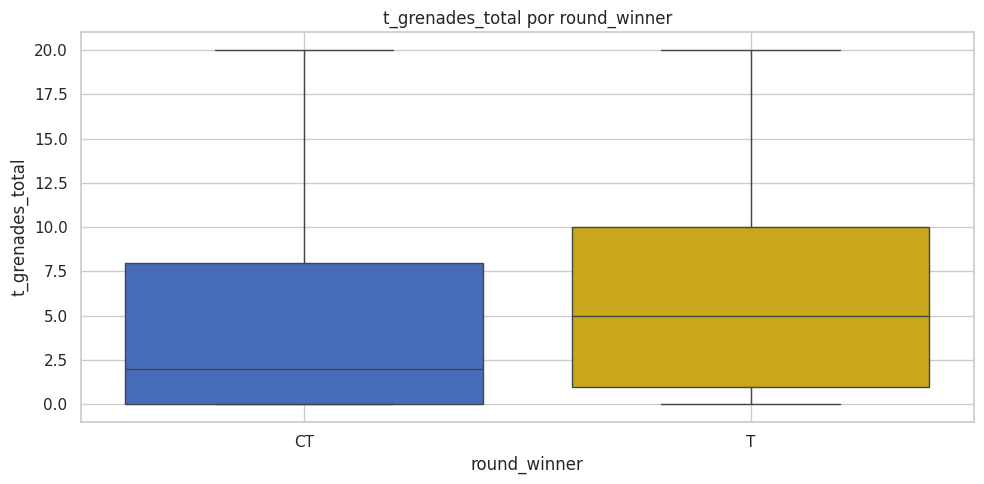

In [21]:
# Histogramas das granadas totais
plot_histogram(df, 'ct_grenades_total', bins=11, color='CT')
plot_histogram(df, 't_grenades_total', bins=11, color='T')

# Boxplots para comparação com o resultado da rodada
plot_box_by_class(df, 'ct_grenades_total', 'round_winner')
plot_box_by_class(df, 't_grenades_total', 'round_winner')


Para entender melhor o uso de utilitários em cada rodada, somamos todas as granadas disponíveis no time CT e T (como smokes, molotovs e flashes).

A análise avalia:

- A distribuição da quantidade total de granadas por time;
- A relação entre essa quantidade e o resultado da rodada.

Com isso, buscamos evidências de que times mais bem equipados taticamente possuem vantagem na rodada. Podemos ver que do lado CT o número de granadas influencia mais para diferenciar o vencedor do round. Ou seja, as granadas quando obtidas pelo lado CT seriam mais efetivas.

Testando agora a hipótese numa situação de final de round (bomba plantada):

In [22]:
df_bomb_planted = df[df['bomb_planted'] == True]


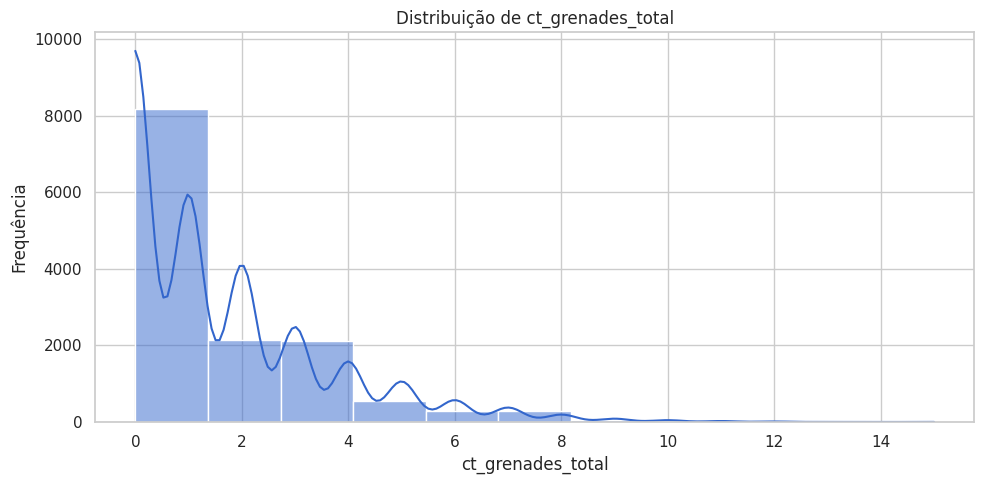

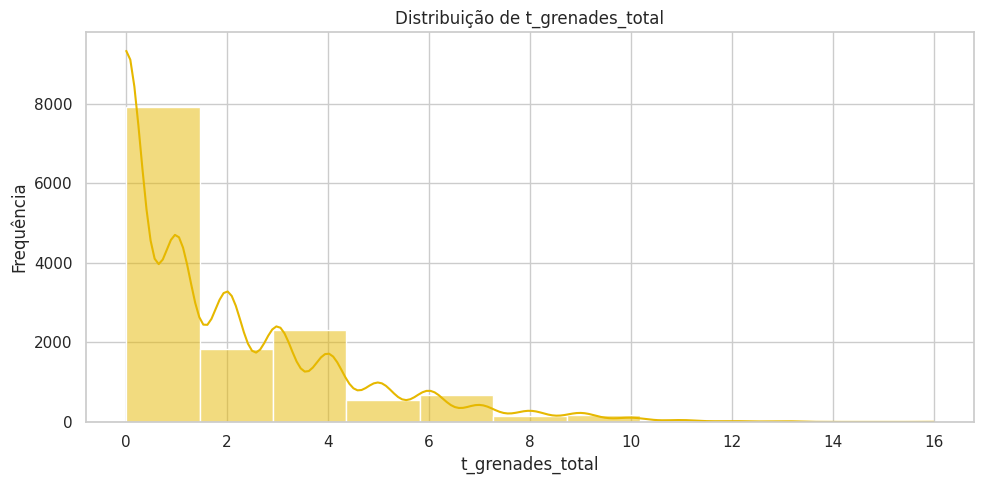

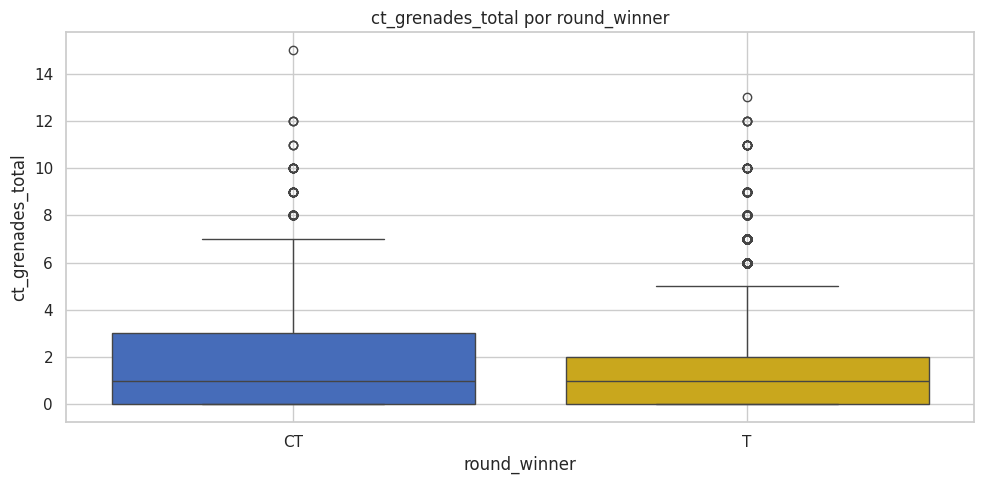

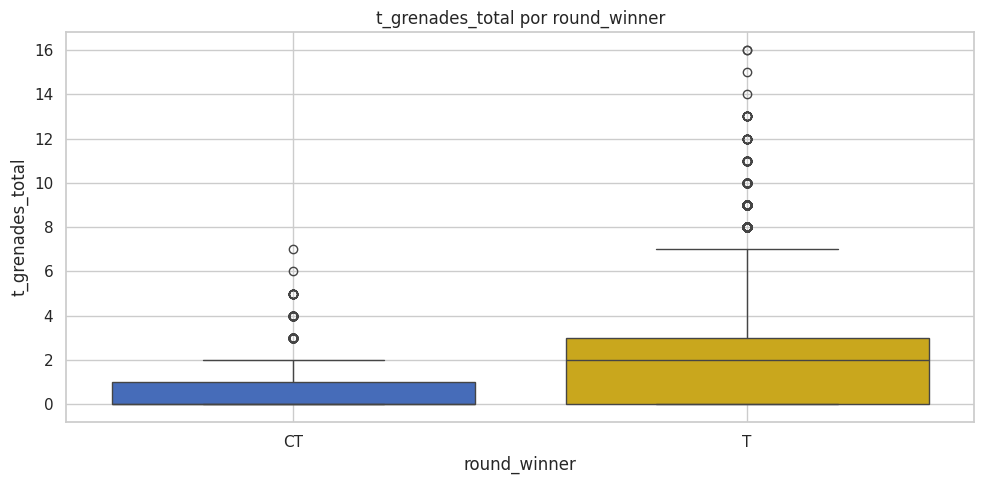

In [23]:
# Histogramas das granadas totais em rounds com bomba plantada
plot_histogram(df_bomb_planted, 'ct_grenades_total', bins=11, color='CT')
plot_histogram(df_bomb_planted, 't_grenades_total', bins=11, color='T')

# Boxplots da influência no resultado em rounds com bomba plantada
plot_box_by_class(df_bomb_planted, 'ct_grenades_total', 'round_winner')
plot_box_by_class(df_bomb_planted, 't_grenades_total', 'round_winner')


Para corroborar de fato com a nossa hipótese analisamos se o uso de granadas muda em situações críticas, mais especificamente nos momentos em que a bomba já foi plantada (final do round).

O objetivo é responder:

- Os times ainda possuem utilitários quando a bomba está armada?
- Existe correlação entre ter granadas no final do round e vencer a rodada?

Ao comparar os histogramas e boxplots com os da análise anterior (sem filtro), podemos observar se há diferença no comportamento dos times. Por exemplo, o time CT pode manter mais granadas para o retake, enquanto o time T pode esgotar utilitários durante a entrada no bombsite.

Essa análise é fundamental para validar a hipótese de que **ter granadas em momentos decisivos afeta diretamente o resultado** da rodada.


#### Influência dos Mapas

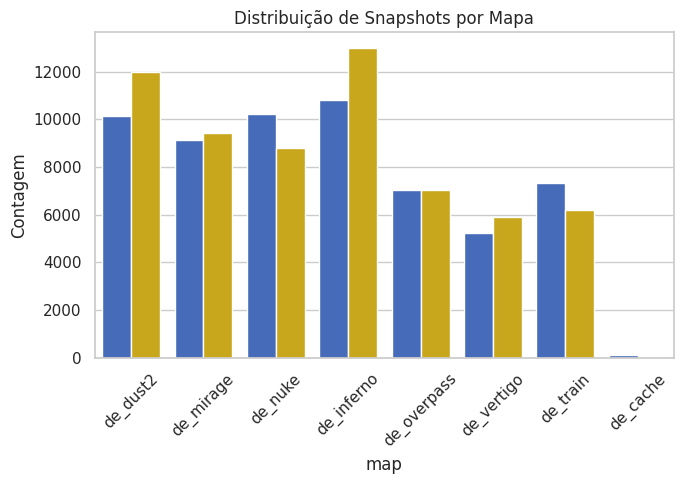

In [24]:
plot_class_distribution(df, 'map', title="Distribuição de Snapshots por Mapa")


Mapas no CS:GO possuem layouts assimétricos, com posições e distâncias que podem favorecer CTs ou Ts.

O gráfico revela tanto o número de snapshots por mapa quanto o time que venceu mais rodadas em cada um. Observamos:

- Mapas como `de_dust2` e `de_inferno` apresentam vantagem clara para o time Terrorista.
- Já `de_nuke` e `de_train` favorecem o time CT.
- Além disso, há forte desbalanceamento no volume de dados por mapa, com `de_inferno` e `de_dust2` sendo os mais frequentes.

Esse cenário apresenta dois desafios:

1. **Viés potencial**: Se certas vitórias estão mais associadas a mapas específicos, o modelo pode aprender padrões falsos.
2. **Desbalanceamento de amostras**: Modelos podem superestimar os padrões de mapas mais frequentes e subestimar mapas menos representados.

Esses fatores devem ser considerados no pré-processamento e modelagem, a fim de garantir generalização e imparcialidade nos resultados.


Para mitigar isso poderiamos:
- Balancear amostras por mapa (downsample dos mais frequentes ou usar amostragem estratificada);

- Criar uma variável categórica “map” como feature, mas monitorar sua importância e interações;

- Treinar e avaliar o modelo separadamente por mapa;

- Remover mapas com dados insignificantes ou desatualizados (ex: de_cache)



## Análises gerais de correlação

In [25]:
# # Ficou muito dificíl a leitura com todas as 97 colunas, por isso está comentado.
# # Correlação entre variáveis numéricas
# correlation_matrix = df.corr(numeric_only=True)
# plt.figure(figsize=(120, 80))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Matriz de Correlação")
# plt.show()

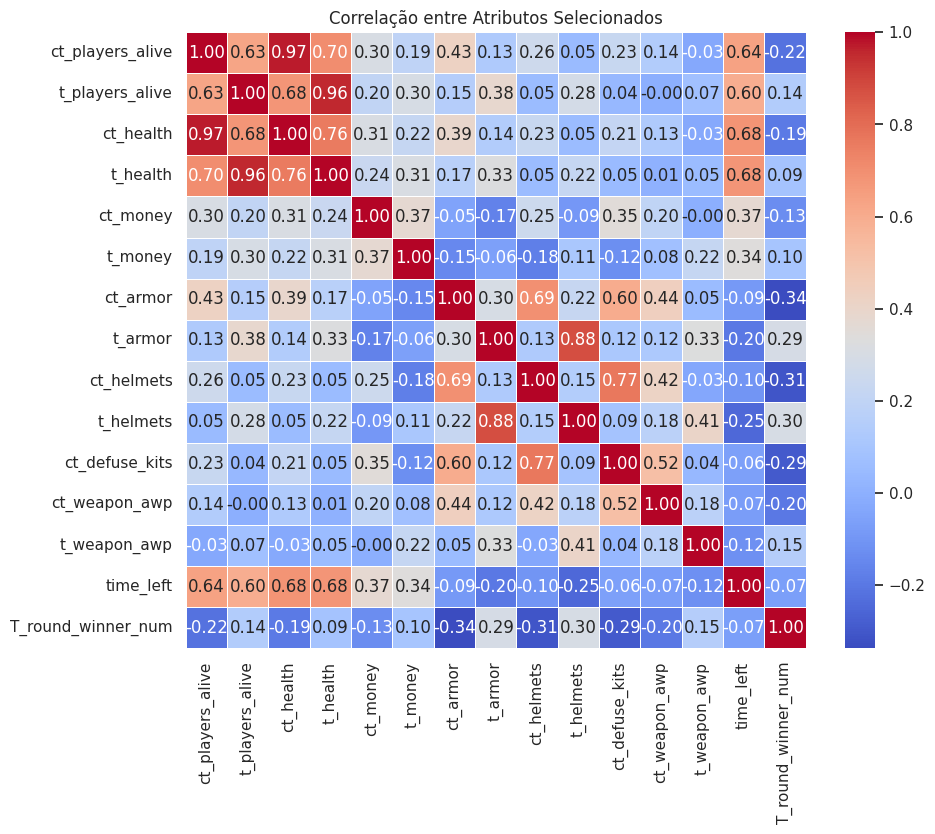

In [26]:
cols_of_interest = [
    'ct_players_alive', 't_players_alive',
    'ct_health', 't_health',
    'ct_money', 't_money',
    'ct_armor', 't_armor',
    'ct_helmets', 't_helmets',
    'ct_defuse_kits', 'ct_weapon_awp', 't_weapon_awp', 'time_left'
]

# Adiciona round_winner como numérico (temporariamente, será feito one hot encoding depois)
df_corr = df.copy()
df_corr['T_round_winner_num'] = df_corr['round_winner'].map({'CT': 0, 'T': 1})

# Calcula e plota
corr_subset = df_corr[cols_of_interest + ['T_round_winner_num']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Atributos Selecionados")
plt.show()


In [27]:
# columns = [
#     # 'ct_players_alive', 't_players_alive',
#     # 'ct_health', 't_health',
#     'ct_money', 't_money',
#     'ct_armor', 't_armor',
#     # 'ct_helmets', 't_helmets',
#     'ct_defuse_kits', 'ct_weapon_awp', 't_weapon_awp', 'round_winner'
# ]

# sns.pairplot(df[columns], hue = "round_winner")

# Balanceamento

### Balanceamento por Mapa

Durante o pré-processamento, identificamos a presença do mapa `de_cache`, que foi **removido da rotação competitiva do CS:GO em 2019**, sendo substituído por `de_vertigo` e por isso possui muitos poucas amostras. Por esse motivo, decidimos **remover completamente os registros com `de_cache`** do dataset, focando apenas nos mapas oficiais que compõem a rotação competitiva no período analisado.

### Mapas considerados após filtragem:

- `de_inferno`
- `de_dust2`
- `de_nuke`
- `de_mirage`
- `de_overpass`
- `de_train`
- `de_vertigo`

### Estratégia de Balanceamento (downsampling)

Em seguida, aplicamos uma estratégia de **balanceamento por downsampling**, igualando a quantidade de snapshots entre os mapas ao **valor mínimo automaticamente detectado entre eles**. Essa abordagem visa:

- Evitar viés para mapas mais frequentes, como `de_inferno`;
- Assegurar que o modelo não aprenda padrões específicos baseados na frequência dos mapas;
- Promover justiça tática entre os contextos das partidas analisadas.

Essa etapa reforça a consistência e a equidade dos dados que serão usados para treinamento e avaliação dos modelos.


In [28]:
# Verifica quantas amostras existem por mapa
map_counts = df['map'].value_counts()
min_samples = map_counts.min()

print("Quantidade de snapshots por mapa (antes do balanceamento):")
display(map_counts)

# Lista dos mapas oficiais no seu dataset (sem o de_cache)
map_pool = [
    'de_inferno', 'de_dust2', 'de_nuke',
    'de_mirage', 'de_overpass', 'de_train', 'de_vertigo'
]

# Filtra o DataFrame original para manter apenas os mapas da rotação
df_csgo_filtered = df[df['map'].isin(map_pool)]

# Aplica balanceamento: downsampling para o número mínimo automaticamente detectado
min_snapshots = df_csgo_filtered['map'].value_counts().min()

df_balanced_maps = (
    df_csgo_filtered
    .groupby('map')
    .apply(lambda x: x.sample(n=min_snapshots, random_state=0)) # A seed = 0 fornecida garante a reprodutibilidade desse downsampling, se não toda vez que rodar teria um resultado diferente
    .reset_index(drop=True)
)

# Verificação da nova distribuição
print("✅ Snapshots por mapa (após balanceamento automático):")
display(df_balanced_maps['map'].value_counts())


Quantidade de snapshots por mapa (antes do balanceamento):


,count
map,
de_inferno,23809
de_dust2,22144
de_nuke,19025
de_mirage,18576
de_overpass,14081
de_train,13491
de_vertigo,11137
de_cache,145


✅ Snapshots por mapa (após balanceamento automático):


/tmp/ipython-input-28-2184828563.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_snapshots, random_state=0)) # A seed = 0 fornecida garante a reprodutibilidade desse downsampling, se não toda vez que rodar teria um resultado diferente


,count
map,
de_dust2,11137
de_inferno,11137
de_mirage,11137
de_nuke,11137
de_overpass,11137
de_train,11137
de_vertigo,11137


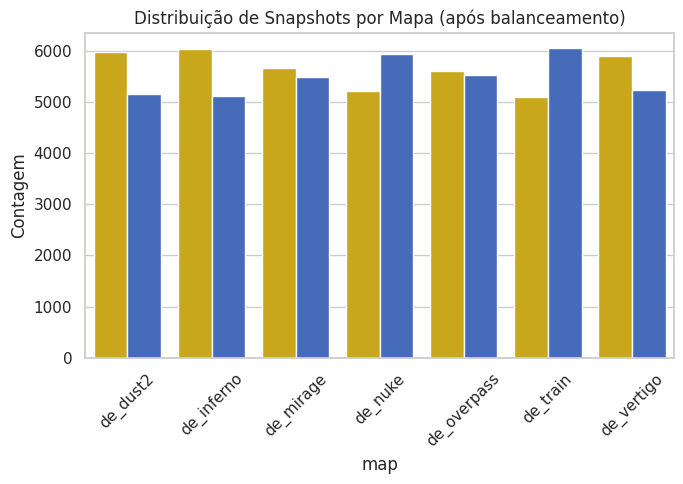

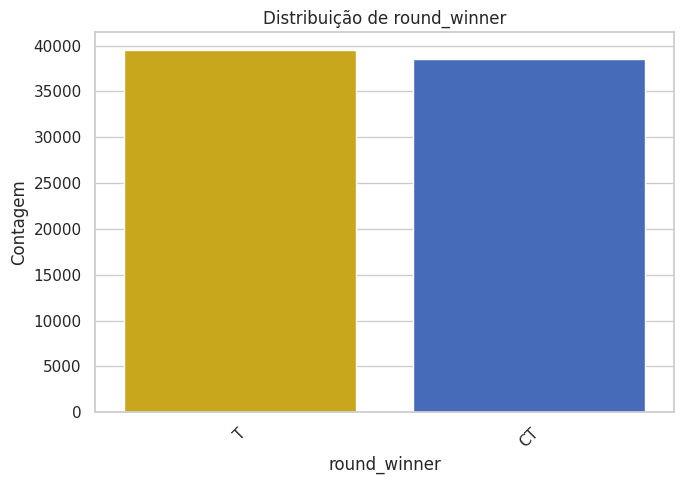

In [29]:
plot_class_distribution(df_balanced_maps, 'map', title="Distribuição de Snapshots por Mapa (após balanceamento)")

plot_class_distribution(df_balanced_maps, 'round_winner')

# 4. Pré-processamento de Dados

Após a análise exploratória (EDA), iniciamos a etapa de **pré-processamento**, cujo objetivo é preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

Nesta etapa, realizaremos:

- **Divisão entre variáveis preditoras e alvo**, preparando os dados para treino e validação de modelos futuros.
- **Codificação de variáveis categóricas**, como o mapa e o vencedor da rodada;
- **Criação de novas variáveis (engenharia de features)** que podem enriquecer a modelagem;
- **Padronização ou normalização** de variáveis numéricas, quando necessário;


Essas transformações são fundamentais para garantir a **qualidade, coerência e desempenho** dos modelos de aprendizado de máquina.


## Separação de Features/Target & Treino/Teste

In [30]:
# Separar features (X) e target (y)
X = df_balanced_maps.drop('round_winner', axis=1)
y = df_balanced_maps['round_winner']

In [31]:
#Divisão treino/teste com base no novo X
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=0
)

In [32]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")
print("---------------------------------------------")
print(f"Distribuição do y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribuição do y_test:\n{y_test.value_counts(normalize=True)}")

Dimensões de X_train: (62367, 98)
Dimensões de X_test: (15592, 98)
Dimensões de y_train: (62367,)
Dimensões de y_test: (15592,)
---------------------------------------------
Distribuição do y_train:
round_winner
T     0.506197
CT    0.493803
Name: proportion, dtype: float64
Distribuição do y_test:
round_winner
T     0.506221
CT    0.493779
Name: proportion, dtype: float64


A primeira etapa do pré-processamento consiste em separar as variáveis explicativas (features) da variável-alvo (target).

- **Target (`y`)**: a variável que queremos prever é `round_winner`, indicando se a rodada foi vencida pelos Terroristas (`T`) ou Contra-Terroristas (`CT`).
- **Features (`X`)**: todas as demais variáveis numéricas e categóricas, exceto `round_winner`.

Em seguida, realizamos a divisão entre **conjunto de treino e teste**, com 80% dos dados para treino e 20% para teste. A divisão foi feita com **estratificação**, para preservar a proporção entre classes no target (`CT` e `T`) em ambos os conjuntos.


## Feature Engineering

In [33]:
# Essa função poderia estar junto com as outras de utils, ou também em um arquivo separado de funções do pre processamento, porém resolvi deixar aqui por legibilidade do notebook.

def engineer_features(df):
    df = df.copy()

    # Saúde efetiva
    df['ct_effective_health'] = df['ct_health'] * df['ct_players_alive']
    df['t_effective_health'] = df['t_health'] * df['t_players_alive']
    df['health_diff'] = df['ct_effective_health'] - df['t_effective_health']

    # Armadura e economia
    df['armor_diff'] = df['ct_armor'] - df['t_armor']
    df['money_diff'] = df['ct_money'] - df['t_money']
    df['players_alive_diff'] = df['ct_players_alive'] - df['t_players_alive']

    # Soma das granadas (todas as colunas que contêm 'grenade_')
    ct_grenades = [col for col in df.columns if col.startswith('ct_grenade_')]
    t_grenades = [col for col in df.columns if col.startswith('t_grenade_')]
    df['grenades_total_ct'] = df[ct_grenades].sum(axis=1)
    df['grenades_total_t'] = df[t_grenades].sum(axis=1)
    df['grenades_diff'] = df['grenades_total_ct'] - df['grenades_total_t']

    return df


In [34]:
# Aplicar no treino e teste
X_train_fe = engineer_features(X_train)
X_test_fe = engineer_features(X_test)

Nesta etapa, criamos novas variáveis a partir do conhecimento de domínio do jogo e de relações encontradas na análise exploratória.

As variáveis criadas têm o objetivo de **combinar atributos fortemente correlacionados** ou gerar métricas compostas mais representativas da situação de cada rodada.

Alguns exemplos incluem:

- `ct_effective_health`: representa o impacto total da saúde do time, ponderado pelo número de jogadores vivos. Foi pensada devida a forte correlação entre `ct_health` e `ct_players_alive`. Evita distorções se há 1 jogador com 100 ou 5 com 20.

- `money_diff`: destaca a diferença de economia entre os times, fator crítico em rodadas de "buy". Essa variavel me parece mais importante para definir um round do que quanto dinheiro cada time tem individualmente. (apenas uma hipótese)
- `grenades_diff`: mede vantagem tática em termos de utilitários disponíveis. Foi pensada para agrupamento do número de granadas e diferenciação em determinados pontos do round. Pode ser interessante de avaliar.
- `players_alive_diff`: mostra vantagem quantitativa direta entre os times. Direto e informativo — quem tem mais jogadores vivos.

Essas variáveis podem ajudar os modelos a capturar padrões mais robustos no comportamento das equipes.


## Encoding das variáveis categóricas

In [35]:
# Codificar variável booleana
X_train_enc = X_train_fe.copy()
X_test_enc = X_test_fe.copy()

X_train_enc['bomb_planted'] = X_train_enc['bomb_planted'].astype(int)
X_test_enc['bomb_planted'] = X_test_enc['bomb_planted'].astype(int)

# One-Hot Encoding da coluna 'map'
X_train_enc = pd.get_dummies(X_train_enc, columns=['map'])
X_test_enc = pd.get_dummies(X_test_enc, columns=['map'])

# Alinhar colunas no teste com as do treino
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)


# Verificação final
print(f"Colunas finais em X_train: {X_train_enc.columns.tolist()}")
print(f"Formato X_train: {X_train_enc.shape}")
print(f"Formato X_test: {X_test_enc.shape}")


Colunas finais em X_train: ['time_left', 'ct_score', 't_score', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90', 'ct_weap

Nesta etapa, realizamos a conversão de variáveis categóricas para formatos numéricos, adequados para algoritmos de ML.

- A variável `bomb_planted`, originalmente booleana (`True` ou `False`), foi convertida para valores inteiros (`1` e `0`).
- A variável `map`, do tipo nominal, foi transformada utilizando **One-Hot Encoding**, que cria uma nova coluna binária para cada mapa da rotação competitiva.

Também foi garantido que o conjunto de teste tivesse as mesmas colunas que o treino, preenchendo com zeros quando necessário. Isso evita problemas futuros durante a previsão.

## Padronização das Variáveis Numérica

In [36]:
# Identificar colunas numéricas contínuas (excluindo a binária 'bomb_planted')
numeric_cols = [col for col in X_train_enc.select_dtypes(include=['int64', 'float64']).columns
                if col != 'bomb_planted']

# Inicializar scaler
scaler = StandardScaler()

# Padronizar treino e teste
X_train_scaled = X_train_enc.copy()
X_test_scaled = X_test_enc.copy()

# Fit-Transform nos dados de Treino
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])

# Transform nos dados de Teste
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])


In [37]:
df_standardized = pd.DataFrame(X_train_scaled, columns = X_train_scaled.columns)

In [38]:
#Transposta pela grande quantidade de colunas

df_standardized.head().transpose()

,2099,63028,5646,62425,38877
time_left,0.310218,-1.294402,-0.057056,1.41149,-1.00499
ct_score,0.891857,0.058571,-1.191357,-1.399678,1.516821
t_score,-1.198017,-0.576745,-1.405108,-1.405108,1.079983
bomb_planted,0,1,0,0,0
ct_health,0.664823,-0.089616,0.664823,0.664823,-0.844054
...,...,...,...,...,...
map_de_mirage,False,False,False,False,False
map_de_nuke,False,False,False,False,True
map_de_overpass,False,False,False,False,False
map_de_train,False,True,False,True,False


Para garantir que todas as variáveis numéricas estejam na mesma escala, aplicamos a técnica de **padronização (StandardScaler)**, que transforma os dados para uma distribuição com **média zero e desvio padrão igual a 1**.

Essa etapa é importante porque:

- Evita que atributos com escalas maiores (ex: dinheiro, vida) dominem o comportamento do modelo.
- Beneficia algoritmos sensíveis à escala dos dados, como KNN, SVM e redes neurais.

> O scaler foi ajustado **exclusivamente com base no conjunto de treino**, garantindo que **nenhuma informação do teste foi usada** durante o pré-processamento, o que evita vazamento de dados.

Normalização ou padronização?

- A **normalização** (escala entre 0 e 1) também poderia ser aplicada, especialmente se usássemos redes neurais profundas ou KNN.
- Neste caso, optamos pela **padronização**, por ser mais robusta a outliers moderados e mais adequada para dados que **não estão no mesmo intervalo originalmente**.

Ambas as técnicas são úteis, mas não são aplicadas simultaneamente.

# 5. Conclusão

O processo de análise e pré-processamento aplicado ao dataset de rodadas de CS:GO evidenciou a importância de entender profundamente os dados antes de seguir para a etapa de modelagem. Ao longo do trabalho, lidamos com um conjunto de dados realista, com características específicas do domínio do jogo.

Iniciamos com uma exploração detalhada dos dados (EDA), onde identificamos padrões relevantes, outliers e variáveis com valores inconsistentes — como somas de saúde superiores ao esperado, ou valores de tempo e dinheiro fora dos limites plausíveis do jogo. Essas anomalias foram tratadas para garantir a confiabilidade das análises posteriores.

Além disso, observamos que havia um desbalanceamento no número de snapshots por mapa. Como certos mapas são mais propensos a favorecer um lado (CT ou T), isso poderia gerar viés nos modelos. Para resolver isso, aplicamos um balanceamento via amostragem estratificada, mantendo apenas os mapas que fazem parte da rotação competitiva oficial.

Em seguida, aplicamos técnicas de *feature engineering*, criando variáveis derivadas como a diferença de vida efetiva entre os times, diferença de granadas, de armadura e de dinheiro — todas elas baseadas em conhecimento do jogo e em correlações observadas durante a EDA. Essas novas variáveis ajudam a tornar o modelo mais sensível a aspectos táticos da partida.

As variáveis categóricas foram codificadas adequadamente (como o uso de One-Hot Encoding para o mapa), e todas as variáveis numéricas foram padronizadas usando `StandardScaler`, sempre respeitando o princípio de evitar vazamento de dados (ou seja, sem usar informações do conjunto de teste durante o ajuste do treino).

---

### Validação das Hipóteses

Durante a análise, levantamos seis hipóteses com base no conhecimento de CS:GO e as exploramos com auxílio de estatísticas e visualizações. Abaixo, segue um resumo das validações:

- **1. O número de jogadores vivos influencia fortemente o resultado da rodada?**  
  Sim. Análises mostraram que rodadas vencidas costumam ter maior número de jogadores vivos no time vencedor.

- **2. Ter a bomba plantada favorece a equipe Terrorista?**  
  Sim. A presença da bomba plantada tende a aumentar as chances de vitória dos Ts, principalmente em rounds mais equilibrados.

- **3. Ter uma AWP no time pode ser decisivo?**  
  Sim. Times com AWP exclusiva tiveram mais vitórias, sugerindo que a arma pode ser fator chave em determinados contextos.

- **4. A economia (dinheiro disponível) afeta as chances de vitória?**  
  Sim. Diferenças no dinheiro disponível entre os times mostraram correlação com o vencedor do round.

- **5. A quantidade de granadas no final do round é um fator decisivo?**  
  Sim. Times com mais granadas disponíveis nos momentos finais, especialmente com bomba plantada, tendem a ter vantagem estratégica.

- **6. Alguns mapas favorecem intrinsecamente um dos lados (CT ou T)?**  
  Sim. Mapas como `de_train` mostraram um viés em favor dos CTs.

---

Com base em todas essas etapas, o dataset agora se encontra preparado para o treinamento de modelos supervisionados. Os dados estão limpos, balanceados, enriquecidos com novas informações relevantes e padronizados — prontos para que algoritmos possam aprender com eles de forma eficaz e sem viés.

Este trabalho demonstrou que, mesmo em contextos de dados complexos como jogos eletrônicos, é possível aplicar rigor técnico, boa estrutura analítica e validação de hipóteses para obter insights sólidos e construir uma base confiável para modelos preditivos.

